### **O problema**

De acordo com o Instituto Locomotiva e MFM Tecnologia, oito em cada dez familias brasileiras estão individades e um terço têm dívidas em atraso. Os índices, que haviam piorado significativamente durante a pandemia da covid-19, já recuaram, mas ainda são elevados, segundo o relatório.

Um dos principais motivos para a inadimplência é o cartão de crédito, de acordo com a pesquisa. O meio de pagamentos foi a fonte de 60% dos débitos em aberto no ano de 2023. Deixar de liquidar dívidas junto a bancos e financeiras e empréstimos e financiamentos também tem sido um desafio para grande parte dos brasileiros. Uma parcela de 43% lida com isso atualmente, proporção que subiu em relação ao ano passado, quando era de 40%.

Essa situação é prejudicial tanto para os consumidores quanto para as instituições financeiras. Detectar os padrões de consumidores que ficarão inadimplentes nos próximos meses e se planejar quanto a isso podem economizar milhões de reais. 

#### **Business Understanding**

Risco de crédito é a possibilidade de não cumprimento das obrigações por parte do tomador, causando perdas financeiras. De acordo com a pesquisa, os principais motivos para a inadimplência foram:

- A falta de planejamento das finanças pessoais (36%)

- A perda do emprego (31%)

- Gastos imprevistos com a saúde (30%)

---

#### **Importando os pacotes necessários**

In [1]:
# Bibliotecas padrão
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Pré processamento de dados
from sklearn.model_selection import train_test_split # Split de dados
from sklearn.preprocessing import MinMaxScaler # Escalonamento de dados
from sklearn.pipeline import Pipeline # Pipeline
from sklearn.preprocessing import PolynomialFeatures # Para criar características de interação
from sklearn.feature_selection import f_classif #Teste F ANOVA

# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Otimização de hiperparâmetros
from sklearn.model_selection import GridSearchCV

# Métricas de avaliação
from sklearn.metrics import roc_auc_score


In [2]:
df = pd.read_excel('default_of_credit_card_clients__courseware_version_1_21_19.xls')
df.drop(['PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], axis=1, inplace=True) # Colunas com dados inválidos

#### **Análise dos Dados**

Esta seção fornece uma visão detalhada da estrutura e do significado dos dados que estão sendo analisados.

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


Como podemos ver, os nomes de todas as colunas estão listados na saída. A coluna de IDs de contas chama-se `ID`. As outras colunas parecem ser as características, com a última coluna sendo a variável de resposta. Examinaremos resumidamente as informações do dataset que nos foi dado pelo cliente:

- `LIMIT_BAL`: valor do crédito fornecido (em novos dólares taiwaneses (NT$)) inclusive o crédito do consumidor individual e familiar (complementar)

- `SEX`: Gênero (1 = masculino; 2 = feminino)

> Nota: Não usaremos os dados de gênero para tomar decisões de solvibilidade devido a considerações éticas.

- `EDUCATION`: Instrução civil (1 = pós-graduação; 2 = universidade; 3 = ensino médio; 4 = outros).

- `MARRIAGE`: Estado civil (1 = casado; 2 = solteiro; 3 = outros).

- `AGE`: Idade (ano).

- `PAY_1`: Registro do ultimo pagamento. A escala de medida do status de reembolso é a seguinte:

    - -2 = conta começou o mês sem valor a ser pago e o crédito não foi usado;

    - -1 = pagamento pontual;

    - 0 = o pagamento mínimo foi feito, mas o saldo total devedor não foi pago
    
    - 1 a 8 = atraso de um a oito mêses no pagamento;

    - 9 = atraso de nove meses ou mais no pagamento.

- `BILL_AMT1-BILL_AMT6`: Valor da fatura (em NT$)

BILL_AMT1 representa o valor da fatura em setembro; BILL_AMT2 representa o valor da fatura em agosto; e assim por diante até BILL_AMT7, que representa o valor da fatura em abril.

- `PAY_AMT1-PAY_AMT6`: Valor de pagamentos anteriores (NT$).

PAY_AMT1 representa o valor pago em setembro; PAY_AMT2 representa o valor pago em agosto; e assim por diante até PAY_AMT6, que representa o valor pago em abril.


Irei visualizar o tamanho de nosso dataframe e os tipos das variáveis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  int64 
 3   EDUCATION                   30000 non-null  int64 
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  int64 
 6   PAY_1                       30000 non-null  object
 7   BILL_AMT1                   30000 non-null  int64 
 8   BILL_AMT2                   30000 non-null  int64 
 9   BILL_AMT3                   30000 non-null  int64 
 10  BILL_AMT4                   30000 non-null  int64 
 11  BILL_AMT5                   30000 non-null  int64 
 12  BILL_AMT6                   30000 non-null  int64 
 13  PAY_AMT1                    30000 non-null  in

De acordo com a saida de nosso código:

- 30000 linhas (ou entradas)

- 20 colunas (ou características)

- Aparentemente não temos nenhum número nulo

Irei averiguar cada uma dessas características

A coluna ID deve conter identificadores exclusivos. Vou verificar se isso realmente acontece em todo o dataset.

In [5]:
df['ID'].nunique()

29687

Esse número deveria ser igual a quantidade total de linhas. Vou averiguar o que está acontecendo com o seguinte código:

In [6]:
df['ID'].duplicated().sum()

313

Aparentemente temos entradas duplicadas. Continuarei averiguando

In [7]:
df.loc[df['ID'].duplicated()]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
241,26bde6da-f148,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
296,42009c72-651f,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
423,73ed1381-3a3f,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
440,4f95b36b-ab10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
498,8d3a2576-a958,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29570,f12b9d9e-ada0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29590,e7cd8c1a-88e9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29746,90330d02-82d9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29785,ad23fe5c-7b09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
df.loc[df['ID'].duplicated()].describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,313.0,313.0,313.0,313.0,313.0,313.0,313.0,313.0,313.0,313.0,313.0,313.0,313.0,313.0,313.0,313.0,313.0,313.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


De acordo com as saídas acima, as entradas duplicadas parecem ter linhas apenas com zeros. Irei excluir essas linhas com o seguinte código:

In [9]:
df_zero_mask = df == 0
feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1)
sum(feature_zero_mask)

315

In [10]:
df = df.loc[~feature_zero_mask,:].copy()
df.shape[0]

29685

Com o código acima limpamos o IDs duplicados além de mais duas entradas contendo somente zeros.

Outra informação inconsistente é a tipo de varíavel de `PAY_1`, dada como um tipo *object* porem deveria ser *int64* de acordo com nosso dicionário de dados. Vamos ver seus valores:

In [11]:
df['PAY_1'].value_counts()

PAY_1
0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: count, dtype: int64

Há uma string 'Not available' que simboliza os dados ausentes e isso nos atrapalha de transformar nossos dados para *int64*. Irei preencher esses dados com a nossa moda, ou seja, nosso valor mais comum no caso o 0.

In [12]:
df['PAY_1'].replace('Not available', 0, inplace=True)
df['PAY_1'].value_counts()

PAY_1
 0    16108
-1     5047
 1     3261
-2     2476
 2     2378
 3      292
 4       63
 5       23
 8       17
 6       11
 7        9
Name: count, dtype: int64

Agora podemos transformar o tipo de váriavel de `PAY_1`

In [13]:
df['PAY_1'] = df['PAY_1'].astype(int)
df['PAY_1'].dtypes

dtype('int64')

### Análise Exploratória de Dados (EDA)

#### Univariada

##### Característica resposta `default payment next month`

<Axes: xlabel='default payment next month', ylabel='Count'>

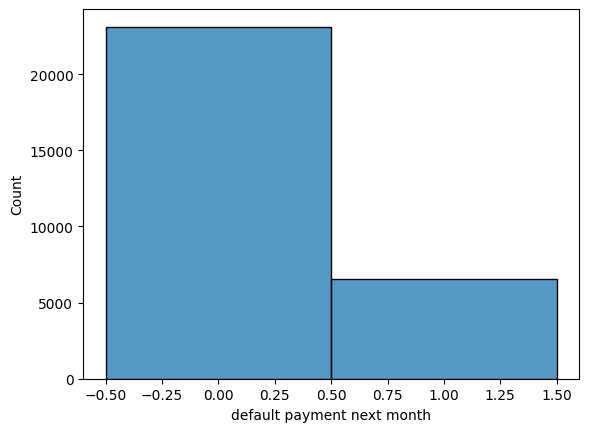

In [14]:
sns.histplot(df['default payment next month'], discrete=True)

In [15]:
df['default payment next month'].value_counts(normalize=True).round(3)

default payment next month
0    0.779
1    0.221
Name: proportion, dtype: float64

Podemos observar que nossa característica resposta é desbalanceada para não-inadimplentes, o que é muito comum nesse tipo de problema.

##### Característica `AGE`

<Axes: xlabel='AGE', ylabel='Count'>

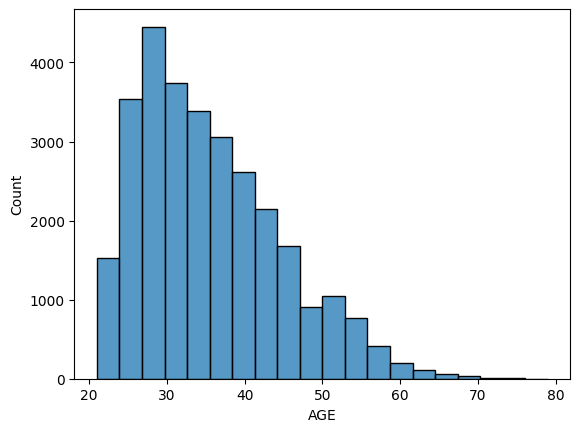

In [16]:
sns.histplot(df['AGE'], bins= 20)

In [17]:
df['AGE'].describe()

count    29685.000000
mean        35.481354
std          9.212199
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

A característica `AGE` que representa a idade parece bem distribuída, sendo a idade minima de 21 anos e com nenhum outlier.

##### Característica `LIMIT_BAL`

<Axes: xlabel='LIMIT_BAL', ylabel='Count'>

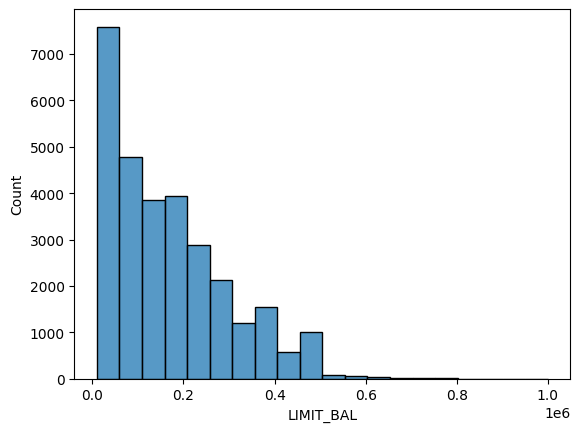

In [18]:
sns.histplot(df['LIMIT_BAL'], bins= 20)

In [19]:
df['LIMIT_BAL'].describe()

count      29685.000000
mean      167519.948796
std       129716.478534
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

Todos os valores do limite de crédito parecem fazer sentido, sendo seu valor minimo de NT$ 10000.

##### Característica `EDUCATION`

In [20]:
df['EDUCATION'].value_counts()

EDUCATION
2    13884
1    10474
3     4867
5      275
4      122
6       49
0       14
Name: count, dtype: int64

Aparentemente temos valores que não constam no dicionário de dados. Como eles não são predominantes, irei agrupá-los na categoria "outros" e verificar novamente a contagem

In [21]:
df['EDUCATION'].replace([0, 5, 6], 4, inplace=True)
df['EDUCATION'].value_counts(normalize= True)*100

EDUCATION
2    46.771097
1    35.283813
3    16.395486
4     1.549604
Name: proportion, dtype: float64

Mais de 70% do nosso dataset já frequentou uma universidade.

Antes de ir para a próxima característica, irei implementar o One-Hot Encoding (OHE) para essa característica

In [22]:
# Crio um mapa
cat_mapping = {
    1: 'graduate school',
    2: 'university',
    3: 'high school',
    4: 'others'
}

# Crio uma nova característica extraindo os dados de EDUCATION e transformando de acordo com o mapa
df['EDUCATION_CAT'] = df['EDUCATION'].map(cat_mapping)

# Crio um novo dataframe com os dummies e concateno com o original
edu_ohe = pd.get_dummies(df['EDUCATION_CAT'], dtype=int)
df = pd.concat([df, edu_ohe], axis=1)

df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,BILL_AMT1,BILL_AMT2,BILL_AMT3,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,3913,3102,689,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2682,1725,2682,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,29239,14027,13559,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,46990,48233,49291,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,8617,5670,35835,...,10000,9000,689,679,0,university,0,0,0,1
5,ceae2946-47e4,50000,1,1,2,37,0,64400,57069,57608,...,657,1000,1000,800,0,graduate school,1,0,0,0
6,d3b8ce26-9c89,500000,1,1,2,29,0,367965,412023,445007,...,38000,20239,13750,13770,0,graduate school,1,0,0,0
7,d6e1911b-54d0,100000,2,2,2,23,0,11876,380,601,...,0,581,1687,1542,0,university,0,0,0,1
8,8421d3b3-2b54,140000,2,3,1,28,0,11285,14096,12108,...,432,1000,1000,1000,0,high school,0,1,0,0
9,62a2fd79-cd90,20000,1,3,2,35,-2,0,0,0,...,0,13007,1122,0,0,high school,0,1,0,0


##### Característica `MARRIAGE`

In [23]:
df['MARRIAGE'].value_counts(normalize=True)*100

MARRIAGE
2    53.259222
1    45.487620
3     1.071248
0     0.181910
Name: proportion, dtype: float64

Novamente, há valores não documentados que devemos agrupar em "outros"

In [24]:
df['MARRIAGE'].replace(0, 3, inplace=True)
df['MARRIAGE'].value_counts(normalize=True)*100

MARRIAGE
2    53.259222
1    45.487620
3     1.253158
Name: proportion, dtype: float64

##### Característica `PAY_1`

<Axes: xlabel='PAY_1', ylabel='Count'>

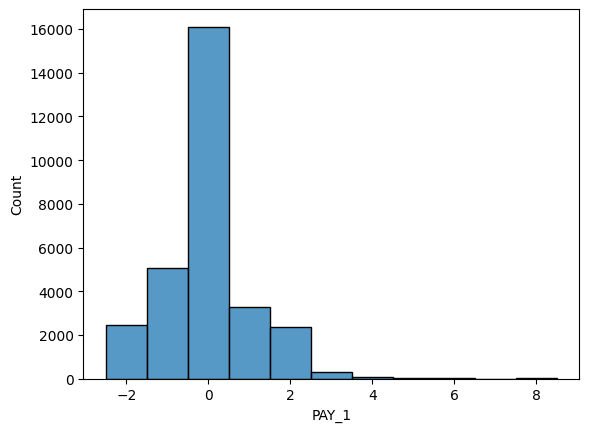

In [25]:
pay_1_bins = np.array(range(-2,10)) - 0.5
sns.histplot(df['PAY_1'], bins=pay_1_bins)

In [26]:
df['PAY_1'].value_counts()

PAY_1
 0    16108
-1     5047
 1     3261
-2     2476
 2     2378
 3      292
 4       63
 5       23
 8       17
 6       11
 7        9
Name: count, dtype: int64

De acordo com o dicionário, podemos considerar que a maioria de nossos registros apresentam uma boa saúde financeira, ou seja, não usada, totalmente paga ou com pelo menos o pagamento mínimo feito.

##### Características `BILL_AMT1` a `BILL_AMT6`

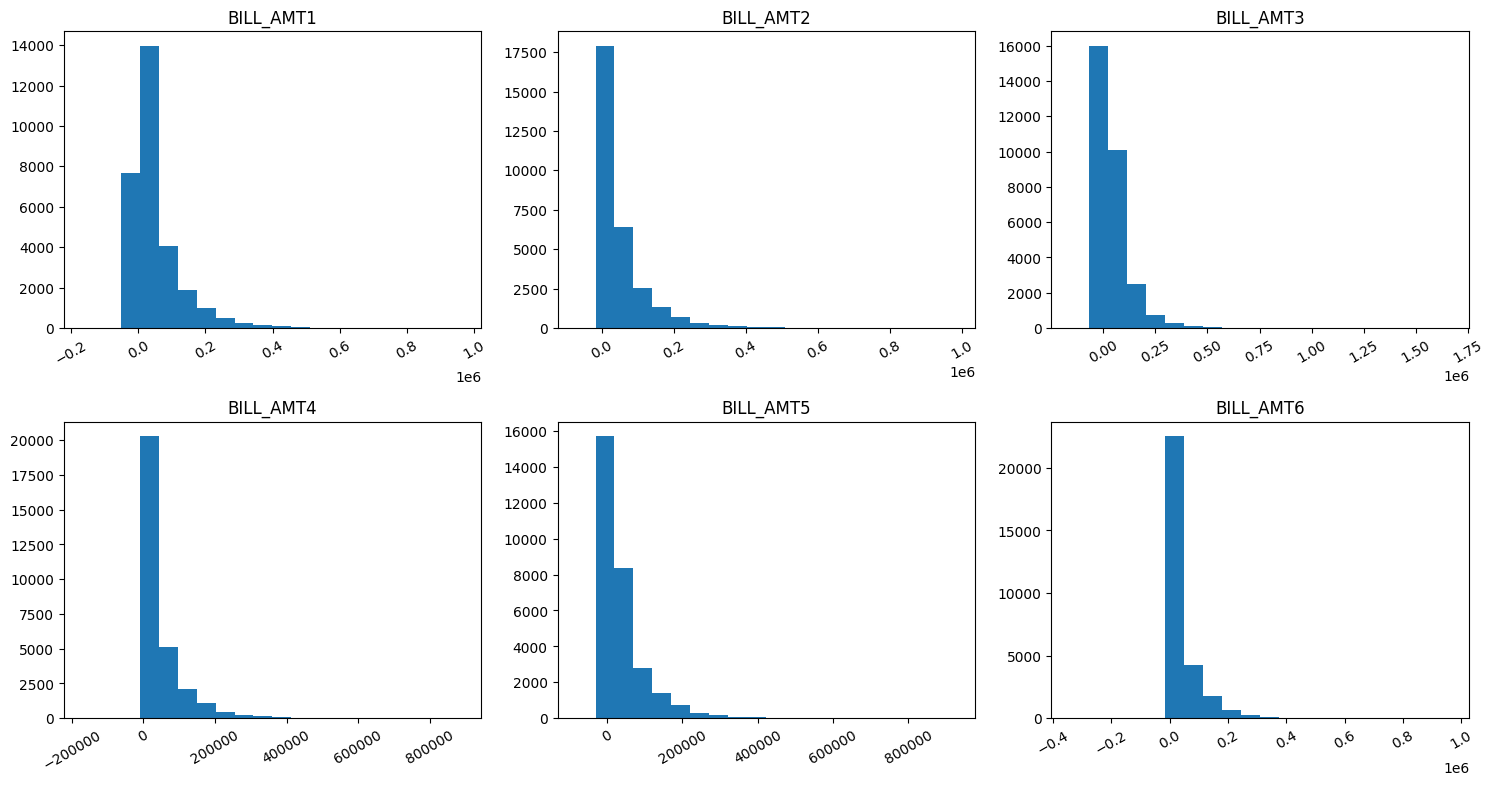

In [27]:
bill_feats = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

df[bill_feats].hist(bins=20, grid=False, xrot=30, figsize=(15,8), layout=(2,3))
plt.tight_layout()

In [28]:
df[bill_feats].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,29685.000000,29685.000000,2.968500e+04,29685.000000,29685.000000,29685.000000
mean,51184.178103,49140.322553,4.699076e+04,43245.439279,40307.628263,38888.682095
std,73578.295929,71091.014997,6.930111e+04,64276.899483,60787.204536,59588.111810
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3560.000000,2984.000000,2.663000e+03,2329.000000,1760.000000,1257.000000
50%,22381.000000,21197.000000,2.010700e+04,19040.000000,18106.000000,17067.000000
75%,67028.000000,63992.000000,6.016700e+04,54515.000000,50244.000000,49252.000000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


Podemos perceber que a maioria das contas tem faturas relativamente baixas, com uma diminuição de contas a partir que a fatura aumenta. Os valores negativos são normais devido ao pagamento a mais da fatura do mês anterior.

##### Características `PAY_AMT1` a `PAY_AMT6`

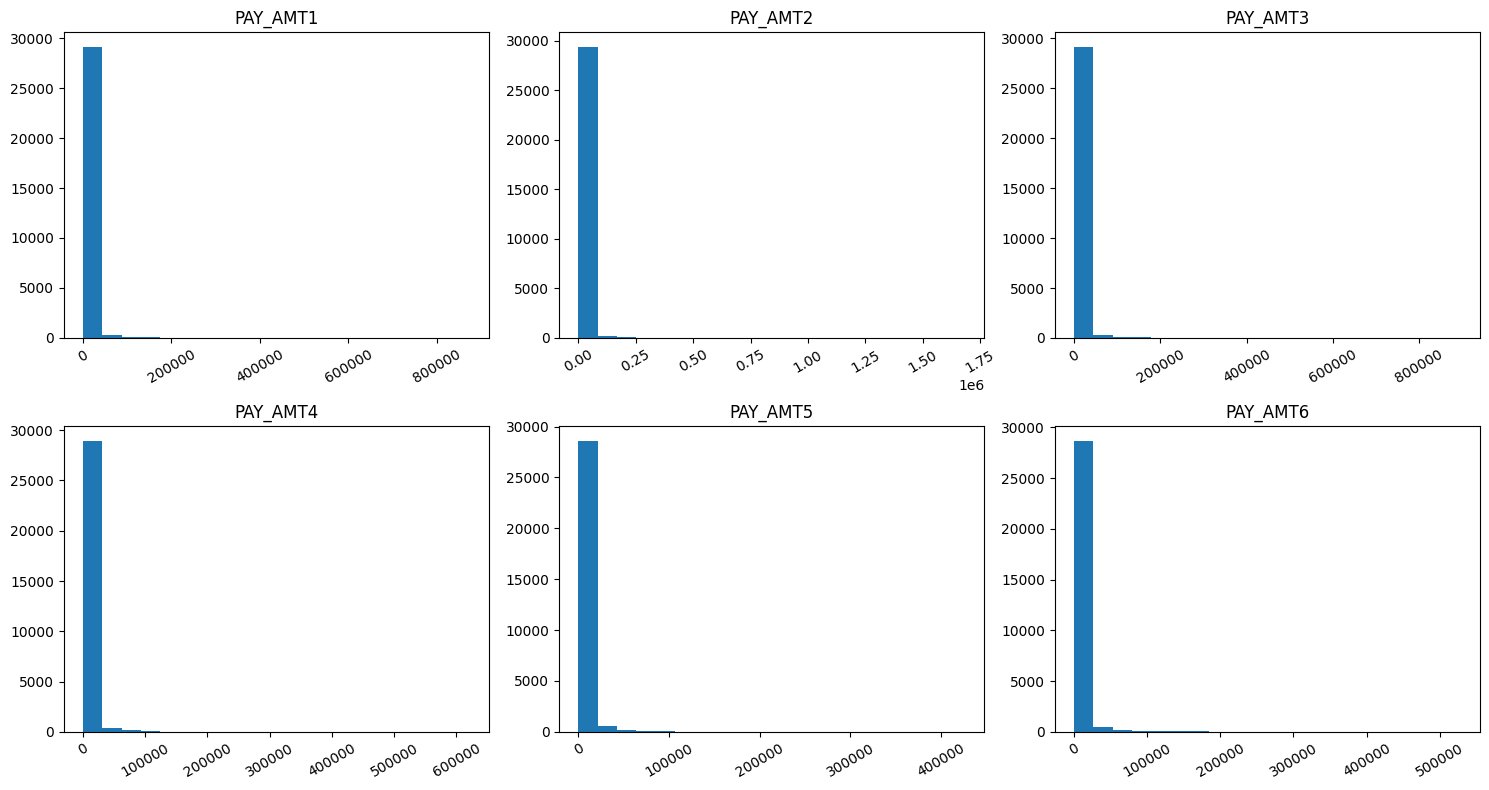

In [29]:
pay_amt_feats = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

df[pay_amt_feats].hist(bins=20, grid=False, xrot=30, figsize=(15,8), layout=(2,3))
plt.tight_layout()

Como esse gráfico não nos diz nada, irei fazer uma transformação em log na base 10

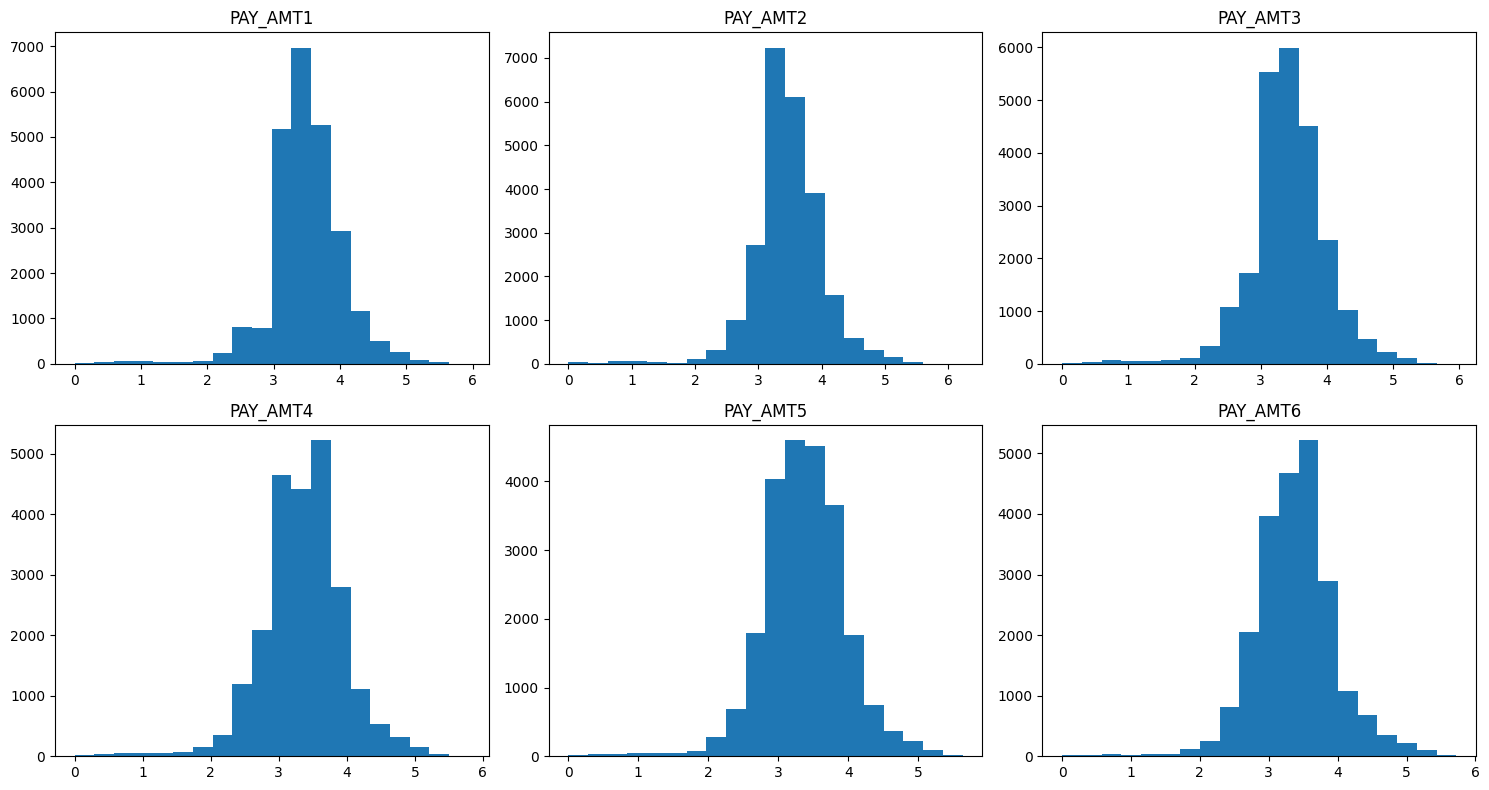

In [30]:
zero_mask = df[pay_amt_feats] != 0 

df[pay_amt_feats][zero_mask].apply(np.log10).hist(bins=20, grid=False, figsize=(15,8), layout=(2,3))
plt.tight_layout()

In [31]:
df[pay_amt_feats].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,29685.000000,2.968500e+04,29685.000000,29685.000000,29685.000000,29685.000000
mean,5672.886812,5.917545e+03,5229.295570,4826.770827,4805.203840,5219.023008
std,16616.452239,2.310628e+04,17650.360969,15607.256127,15311.798994,17798.365183
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,8.320000e+02,390.000000,296.000000,250.000000,115.000000
50%,2100.000000,2.008000e+03,1800.000000,1500.000000,1500.000000,1500.000000
75%,5007.000000,5.000000e+03,4508.000000,4015.000000,4041.000000,4000.000000
max,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


Podemos ver que os pagamentos que mais acorrem estão no intervalo de milhares, no geral a distribuição de pagamentos parece bem constante de um mês para o outro.

Outra visualização que podemos ter é que os pagamentos médios tem valores menores que os valores das faturas e isso faz sentido de acordo com a exploração da nossa característica `PAY_1` onde o valor predominante era 0 (a conta fez o pagamento mínimo).

#### Bivariada

Agora vamos analisar o comportamento de nossa caracteristica repostas em relação a nossa caracteristica alvo.

##### Matriz de Correlação e o teste F.

Irei utilizar o heatmap do Seaborn para criar uma visualização clara e geral da matriz de correlação de Pearson de todas nossas características e após, irei utilizar o teste F ANOVA para entender melhor a relação entre nossas caracteristícas e a resposta.

<Axes: >

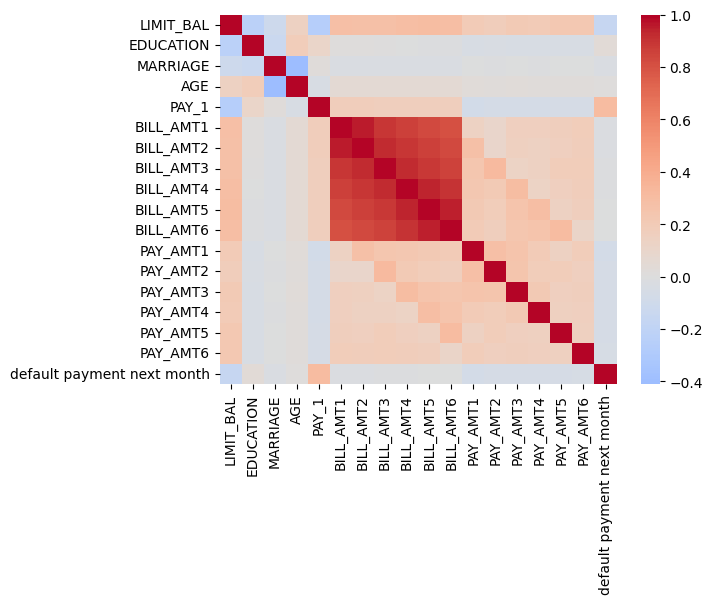

In [32]:
features_response = ['LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month']

corr = df[features_response].corr(numeric_only=True)
sns.heatmap(corr, center=0, cmap='coolwarm')

Podemos observar que varias características se correlacionam umas com as outras, principalmente as características `BILL_AMT`. Isso já era de se esperar.

Apesar de ajudar a dar uma visão geral da utilidade das características, a correlação de Pearson não é muito apropriada para uma variável de resposta binária.

Uma forma mais adequada de observar a associação das características com uma resposta categórica é pelo teste F ANOVA. Irei executar o código e tranformar-los em um DataFrame.

In [33]:
X = df[features_response].drop('default payment next month', axis=1)
y = df['default payment next month']

[f_stat, f_p_value] = f_classif(X,y)

f_test_df = pd.DataFrame({'Feature':features_response[:-1],
                          'F statistic':f_stat,
                          'p value':f_p_value})
f_test_df.sort_values('p value')

,Feature,F statistic,p value
4,PAY_1,3126.713572,0.000000e+00
0,LIMIT_BAL,717.548548,3.299091e-156
11,PAY_AMT1,158.773310,2.598410e-36
12,PAY_AMT2,100.549372,1.259341e-23
14,PAY_AMT4,95.463845,1.628663e-22
13,PAY_AMT3,92.616578,6.832446e-22
15,PAY_AMT5,89.671119,3.013470e-21
16,PAY_AMT6,83.172561,7.980774e-20
1,EDUCATION,34.662525,3.963209e-09
2,MARRIAGE,23.430213,1.301786e-06


Podemos chegar em conclusões semelhantes pelo DataFrame da estatística F e dos valores p e ao que observamos na plotagem de correlação de Pearson: `PAY_1` e `LIMIT_BAL` são as características mais úteis. Elas têm p-valores menores o que indica que os valores da média dessas características entre a classe positiva e negativa são significativamente diferentes e nos ajudarão a prever a que classe uma amostra pertence.

##### Característica `PAY_1` x Característica resposta `default payment next month`

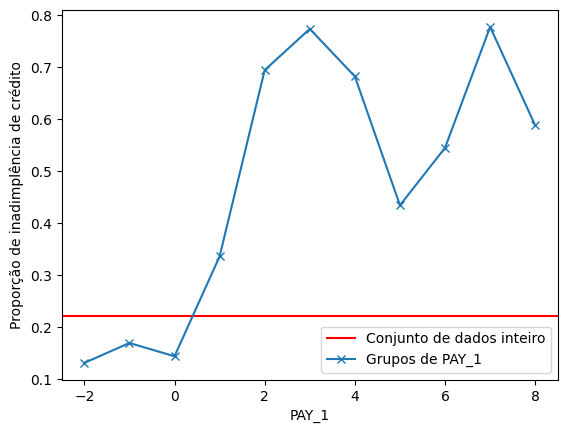

In [34]:
axes = plt.axes()
axes.axhline(df['default payment next month'].mean(), color='red')
df.groupby('PAY_1')['default payment next month'].mean().plot(marker='x', legend=False, ax=axes)
axes.set_ylabel('Proporção de inadimplência de crédito')
axes.legend(['Conjunto de dados inteiro', 'Grupos de PAY_1'])

O gráfico acima mostra uma informação muito importante: quem já inadimpliu apresenta uma tendência maior de fazê-lo novamente. A taxa de inadimplência de contas em boa situação está bem abaixo da taxa geral e pelo menos 30% das contas que estavam inadimplentes no último mês estarão inadimplentes novamente.

##### Característica `LIMIT_BAL` x Característica resposta `default payment next month`

/tmp/ipykernel_1059488/616430898.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(np.round(y_ticks*50000, 2))


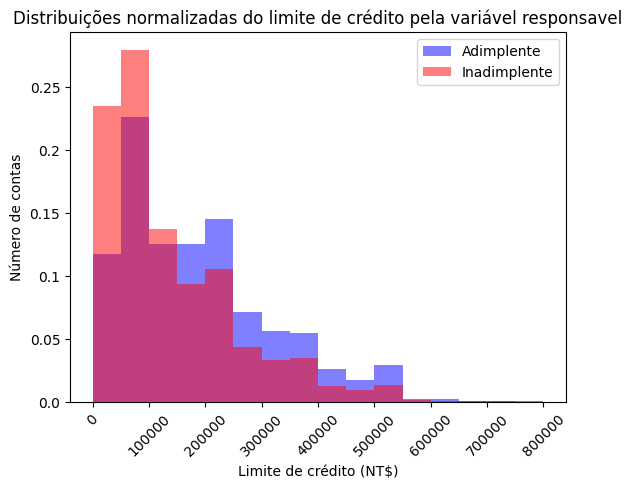

In [35]:
bin_edges = list(range(0, 850000, 50000))

axes = plt.axes()
axes.hist(df.loc[y == 0, 'LIMIT_BAL'], bins= bin_edges, alpha=0.5, density= True, color='blue')
axes.hist(df.loc[y == 1, 'LIMIT_BAL'], bins= bin_edges, alpha=0.5, density= True, color='red')
axes.tick_params(axis='x', labelrotation=45)
axes.set_xlabel('Limite de crédito (NT$)')
axes.set_ylabel('Número de contas')
y_ticks = axes.get_yticks()
axes.set_yticklabels(np.round(y_ticks*50000, 2))
axes.legend(['Adimplente', 'Inadimplente'])
axes.set_title('Distribuições normalizadas do limite de crédito pela variável responsavel');

Aparentemente, contas com limites menores de créditos, de aproximadamente NT$ 150,000 são relativamente mais propensas a inadimplir. O que faz sentido ao entender que as instituições dão limites menores a conntas que apresentam mais risco de inadimplência.

#### **Pré processamento de dados**

##### Split de dados

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=24)

#### **Modelo LogisticRegression**

##### Criando o pipeline

In [37]:
# Escalonamento de dados
min_max_sc = MinMaxScaler()

# Primeiro modelo a ser utilizado
C_val_exponents = np.linspace(2, -3, 6)
C_vals = np.float64(10)**C_val_exponents
param_C = {'C': C_vals}

lr = LogisticRegression(penalty='l1', solver='saga', max_iter=1000)
cv_lr = GridSearchCV(lr, param_grid=param_C, scoring='roc_auc', n_jobs=None, refit=True, cv=4, pre_dispatch='None', error_score=np.nan, return_train_score=True)

# Pipeline
scale_lr_pipeline = Pipeline([('scaler', min_max_sc), ('model', cv_lr)])

No código acima foi criado um pipeline com duas etapas:

- O modelo que utilizaremos de regressão logística com os parâmetros `penalty='l1'`, a penalização lasso, e o `solver='saga'` para essa penalização, o `max_iter=1000`.

    - O `GridSearchCV` irá fazer uma procura em validação cruzada para o melhor valor de hiperparâmetro `C`

- O escalonador para que todas as características estejam na mesma escala e sejam igualmente penalizadas, recomendado para o `solver='saga'`.

Ajustando o modelo e obtendo o ROC AUC

In [38]:
# Ajuste do modelo
scale_lr_pipeline.fit(X_train, y_train)

# ROC AUC de treino
y_train_predict_proba = scale_lr_pipeline.predict_proba(X_train)
y_train_roc_auc = roc_auc_score(y_train, y_train_predict_proba[:,1])

# ROC AUC de teste
y_test_predict_proba = scale_lr_pipeline.predict_proba(X_test)
y_test_roc_auc = roc_auc_score(y_test, y_test_predict_proba[:,1])

print('Melhor parâmetro:', cv_lr.best_params_)
print('ROC AUC de treino:', y_train_roc_auc.round(3))
print('ROC AUC de teste:', y_test_roc_auc.round(3))

Melhor parâmetro: {'C': 100.0}
ROC AUC de treino: 0.713
ROC AUC de teste: 0.712


Para tentar obter um melhor modelo de LogisticRegression, irei criar caracteristicas de interação

In [39]:
make_interactions = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_interact = make_interactions.fit_transform(X)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_interact, df['default payment next month'].values, test_size=0.2, random_state=24)

Ajustando o modelo e obtendo o ROC AUC com as novas caracteristicas e com o valor de C definido

In [40]:
# Pipeline
lr = LogisticRegression(penalty='l1', solver='saga', max_iter=1000, C=100)
scale_lr_pipeline = Pipeline([('scaler', min_max_sc), ('model', lr)])

# Ajuste do modelo
scale_lr_pipeline.fit(X_train_2, y_train_2)

# ROC AUC de treino
y_train_predict_proba = scale_lr_pipeline.predict_proba(X_train_2)
y_train_roc_auc = roc_auc_score(y_train_2, y_train_predict_proba[:,1])

# ROC AUC de teste
y_test_predict_proba = scale_lr_pipeline.predict_proba(X_test_2)
y_test_roc_auc = roc_auc_score(y_test_2, y_test_predict_proba[:,1])

print('ROC AUC de treino:', y_train_roc_auc.round(3))
print('ROC AUC de teste:', y_test_roc_auc.round(3))

ROC AUC de treino: 0.735
ROC AUC de teste: 0.729


/home/matheus/.pyenv/versions/python-alura/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Com a criação das novas caracteristicas de interação, consegui aumentar a pontuação do modelo de regressão logística de **0.712** para **0.729**.

#### **Modelo DecisionTree**

Instanciando o modelo de Árvore de Decisão

In [41]:
dt = DecisionTreeClassifier()

Para o modelo de árvore de decisão, irei procurar com o *GridSearchCV* a melhor profundidade máxima para o nosso dataframe

In [42]:
params = {'max_depth':[1, 2, 4, 6, 8, 10, 12]}

cv = GridSearchCV(dt, param_grid=params, scoring='roc_auc', n_jobs=None, refit=True, cv=4, verbose=1, pre_dispatch='None', error_score=np.nan, return_train_score=True)

Fitting 4 folds for each of 7 candidates, totalling 28 fits


Text(0, 0.5, 'ROC AUC')

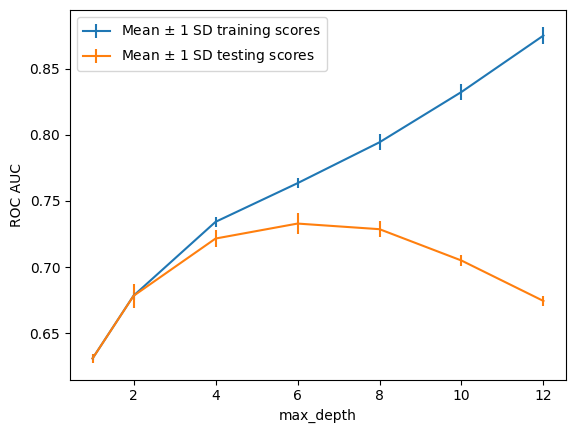

In [43]:
cv.fit(X_train, y_train)

cv_results_df = pd.DataFrame(cv.cv_results_)

ax = plt.axes()
ax.errorbar(cv_results_df['param_max_depth'],
            cv_results_df['mean_train_score'],
            yerr=cv_results_df['std_train_score'],
            label='Mean $\pm$ 1 SD training scores')
ax.errorbar(cv_results_df['param_max_depth'],
            cv_results_df['mean_test_score'],
            yerr=cv_results_df['std_test_score'],
            label='Mean $\pm$ 1 SD testing scores')
ax.legend()
plt.xlabel('max_depth')
plt.ylabel('ROC AUC')

In [44]:
cv_results_df.sort_values('rank_test_score', ascending=True)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
3,0.131414,0.000457,0.003196,0.000058,6,{'max_depth': 6},0.744112,0.721903,0.733598,0.732145,0.732939,0.007869,1,0.761712,0.768579,0.764806,0.758666,0.763441,0.003676
4,0.171121,0.000478,0.003397,0.000108,8,{'max_depth': 8},0.736597,0.720248,0.726828,0.731117,0.728697,0.005982,2,0.794361,0.802556,0.795213,0.785195,0.794331,0.006162
2,0.093545,0.003125,0.003306,0.000164,4,{'max_depth': 4},0.730482,0.714930,0.723991,0.717121,0.721631,0.006107,3,0.728562,0.733869,0.739264,0.735278,0.734243,0.003830
5,0.208006,0.001176,0.003493,0.000084,10,{'max_depth': 10},0.702929,0.699854,0.709389,0.707900,0.705018,0.003822,4,0.833552,0.837359,0.836358,0.822081,0.832337,0.006084
1,0.050851,0.000325,0.003141,0.000088,2,{'max_depth': 2},0.692875,0.678705,0.670293,0.671611,0.678371,0.008964,5,0.673747,0.678240,0.681259,0.680675,0.678480,0.002958
6,0.242441,0.001663,0.003515,0.000095,12,{'max_depth': 12},0.671674,0.672527,0.672880,0.680827,0.674477,0.003692,6,0.876096,0.878434,0.881277,0.863967,0.874943,0.006598
0,0.030080,0.005345,0.003257,0.000155,1,{'max_depth': 1},0.636285,0.627406,0.631317,0.629423,0.631108,0.003293,7,0.629382,0.632340,0.631037,0.631668,0.631107,0.001097


In [45]:
print('A melhor média de ROC AUC dos dados de teste é:', cv_results_df.sort_values('rank_test_score', ascending=True)['mean_test_score'].head(1).values.round(3))

A melhor média de ROC AUC dos dados de teste é: [0.733]


Com a arvore de decisão, obtivemos uma ROC AUC de **0.733**.

#### **Modelo RandomForest**

Instanciando o modelo

In [46]:
rf = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=3, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=4, verbose=0, warm_start=False, class_weight=None)

In [47]:
rf_params = {'max_depth': [3, 6, 9, 12],
             'n_estimators': [10, 50, 100, 200]}

cv_rf = GridSearchCV(rf, param_grid=rf_params, scoring='roc_auc', n_jobs=None, refit=True, cv=4, verbose=2, pre_dispatch='None', error_score='raise', return_train_score=True)

cv_rf.fit(X_train, y_train)

Fitting 4 folds for each of 16 candidates, totalling 64 fits
[CV] END .......................max_depth=3, n_estimators=10; total time=   0.2s


[CV] END .......................max_depth=3, n_estimators=10; total time=   0.2s
[CV] END .......................max_depth=3, n_estimators=10; total time=   0.2s
[CV] END .......................max_depth=3, n_estimators=10; total time=   0.2s
[CV] END .......................max_depth=3, n_estimators=50; total time=   0.7s
[CV] END .......................max_depth=3, n_estimators=50; total time=   0.7s
[CV] END .......................max_depth=3, n_estimators=50; total time=   0.7s
[CV] END .......................max_depth=3, n_estimators=50; total time=   0.7s
[CV] END ......................max_depth=3, n_estimators=100; total time=   1.4s
[CV] END ......................max_depth=3, n_estimators=100; total time=   1.4s
[CV] END ......................max_depth=3, n_estimators=100; total time=   1.4s
[CV] END ......................max_depth=3, n_estimators=100; total time=   1.4s
[CV] END ......................max_depth=3, n_estimators=200; total time=   2.8s
[CV] END ...................

GridSearchCV(cv=4, error_score='raise',
             estimator=RandomForestClassifier(max_depth=3, n_estimators=10,
                                              random_state=4),
             param_grid={'max_depth': [3, 6, 9, 12],
                         'n_estimators': [10, 50, 100, 200]},
             pre_dispatch='None', return_train_score=True, scoring='roc_auc',
             verbose=2)

In [48]:
cv_rf.best_params_

{'max_depth': 9, 'n_estimators': 200}

In [49]:
cv_rf.best_score_

0.7723138055552514

Com o modelo de Floresta Aleatória, obtivemos nosso melhor desempenho com um ROC AUC de **0.772**. Esse deve ser o melhor modelo para o conjunto, logo iremos treinar esse como o nosso modelo final.

In [50]:
rf = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=9, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=4, verbose=1, warm_start=False, class_weight=None)

In [51]:
rf.fit(X_train, y_train)
y_test_predict_proba = rf.predict_proba(X_test)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    8.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s


In [52]:
roc_auc_score(y_test, y_test_predict_proba[:,1])

0.7723949940667546

Com o resultado acima de **0.772** concluimos que nosso modelo é robusto e pronto para distribuição.

#### **Análise financeira**

Para fazer uma analise financeira, vamos supor o caso de que, para as contas de crédito que estejam em alto risco de inadimplência será oferecido um aconselhamento ao titular que custará NT$ 7.500,00 para a empresa com uma taxa de sucesso esperada de 70% para que paguem sua dívida a tempo ou façam acordos alternativos. Os possiveis benefícios do aconselhamento bem-sucedido são que o valor da cobrança mensal de uma conta será percebido como economia, se ela fosse ficar inadimplente, mas não ficou como resultado da conversa.

Portanto, vamos calcular os custos e a economia esperada em um intervalo de limites.

Para calcular a possivel economia alcançada com a não inadimplência, usaremos o valor médio da ultima fatura mensal de todas as contas

In [53]:
economia_por_inadimplencia = df['BILL_AMT1'].mean()
economia_por_inadimplencia

51184.17810341923

In [54]:
custo_aconselhamento = 7500
efetividade =0.7

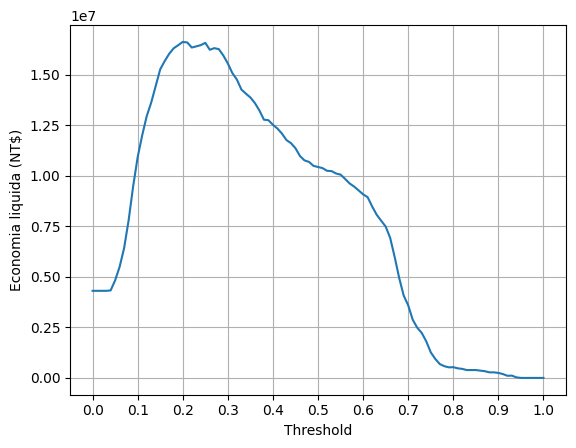

In [55]:
thresholds = np.linspace(0, 1, 101)

n_pos_pred = np.empty_like(thresholds)
custo_total_aconselhamento = np.empty_like(thresholds)
n_true_pos = np.empty_like(thresholds)
economia_total = np.empty_like(thresholds)
savings_based_on_balances = np.empty_like(thresholds)

counter = 0
for threshold in thresholds:
    
    pos_pred = y_test_predict_proba[:,1]>threshold
    n_pos_pred[counter] = sum(pos_pred)
    custo_total_aconselhamento[counter] = n_pos_pred[counter] * custo_aconselhamento
    true_pos = pos_pred & y_test.astype(bool)
    n_true_pos[counter] = sum(true_pos)
    economia_total[counter] = n_true_pos[counter] * economia_por_inadimplencia * efetividade
    counter += 1

economia_liquida = economia_total - custo_total_aconselhamento

plt.plot(thresholds, economia_liquida)
plt.xlabel('Threshold')
plt.ylabel('Economia liquida (NT$)')
plt.xticks(np.linspace(0,1,11))
plt.grid(True)

O gráfico nos mostra que o limite ideal que representa a maior economia liquida esta no intervalo de 0.2 a 0.25. Para ser mais preciso, vamos ver qual o valor exato do limite e quanto irá nos economizar.

In [56]:
max_savings_ix = np.argmax(economia_liquida)
print('O limite que representa a maior economia: ', thresholds[max_savings_ix])
print('A maior economia liquida possivel: ', economia_liquida[max_savings_ix].round(2))

O limite que representa a maior economia:  0.2
A maior economia liquida possivel:  16616768.55


### Conclusão geral

Após uma análise aprofundada das métricas de desempenho e financeiro, podemos observar que o modelo final obteve um score de ROC AUC igual a 0.772, e a nosso economia seria de aproximadamente NT$ 16,6 milhões, ou R$ 2,6 milhões na conversão atual.